In [36]:
from teradataml import *
import chess
import time

In [37]:
# Connect with Teradata Database
eng = create_context("192.168.56.1", "val", "val")
conn = get_connection()

In [38]:
#board = chess.Board("1k1r4/pp1b1R2/3q2pp/4p3/2B5/4Q3/PPP2B2/2K5 b - - 0 1")
in_board_fen_array = execute_sql("SELECT FEN from replay_buffer WHERE game_id = 500 and ply = 0")
in_board_fen = (in_board_fen_array.fetchall()[0][0])
print(in_board_fen)
board = chess.Board(in_board_fen)
board2 = chess.Board(in_board_fen)

play_board_fen = in_board_fen
turn = 'white'

for counter in range(200):

    all_moves = str(board.legal_moves)
    start_pos = [pos for pos, char in enumerate(all_moves) if char == '(']
    end_pos = [pos for pos, char in enumerate(all_moves) if char == ')']
    all_moves_string= all_moves[start_pos[0]+1:end_pos[0]]
    all_moves_string = all_moves_string.replace(" ", "")
    all_moves_array = all_moves_string.split(',')

    best_reward = 0
    best_move = ''


    for ply in all_moves_array:
        board.push_san(ply)
        fen = board.fen()
        spaces_pos = [pos for pos, char in enumerate(fen) if char == ' ']
        search_fen = fen[:spaces_pos[3]]
        reward_array = execute_sql("SELECT reward_aggregate from states WHERE FEN = '" + search_fen + "';")
        
        try:
            reward = (reward_array.fetchall()[0][0])
        except:
            reward = 0
            
        if turn=='white':
            if reward >= best_reward:
                best_reward = reward
                best_move = ply
        else:
            if reward <= best_reward:
                best_reward = reward
                best_move = ply
        
        #print("FEN: " + search_fen + " reward aggregate is: " + str(reward) + ".")
        board = chess.Board(play_board_fen)
        #print("The best move found was: " + best_move + " with reward: " + str(best_reward) + ".")
    
    board.push_san(best_move)
    board2.push_san(best_move)
    fen = board.fen()
    spaces_pos = [pos for pos, char in enumerate(fen) if char == ' ']
    print("Updated board: " + board2.fen() + " after move " + best_move)
    play_board_fen = fen[:spaces_pos[3]]
    if turn == 'white':
        turn = 'black'

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq -
Updated board: rnbqkbnr/pppppppp/8/8/8/4P3/PPPP1PPP/RNBQKBNR b KQkq - 0 1 after move e3
Updated board: r1bqkbnr/pppppppp/n7/8/8/4P3/PPPP1PPP/RNBQKBNR w KQkq - 1 2 after move Na6
Updated board: r1bqkbnr/pppppppp/n7/1B6/8/4P3/PPPP1PPP/RNBQK1NR b KQkq - 2 2 after move Bb5
Updated board: r1bqkb1r/pppppppp/n4n2/1B6/8/4P3/PPPP1PPP/RNBQK1NR w KQkq - 3 3 after move Nf6
Updated board: r1bqkb1r/pppppppp/n4n2/1B6/8/4P3/PPPPNPPP/RNBQK2R b KQkq - 4 3 after move Ne2
Updated board: r1bqkb1r/pppppppp/n7/1B5n/8/4P3/PPPPNPPP/RNBQK2R w KQkq - 5 4 after move Nh5
Updated board: r1bqkb1r/pppppppp/n7/7n/B7/4P3/PPPPNPPP/RNBQK2R b KQkq - 6 4 after move Ba4
Updated board: r1bqkb1r/pppp1ppp/n3p3/7n/B7/4P3/PPPPNPPP/RNBQK2R w KQkq - 0 5 after move e6
Updated board: r1bqkb1r/pppp1ppp/n3p3/7n/B2P4/4P3/PPP1NPPP/RNBQK2R b KQkq - 0 5 after move d4
Updated board: r1bqkbr1/pppp1ppp/n3p3/7n/B2P4/4P3/PPP1NPPP/RNBQK2R w KQq - 1 6 after move Rg8
Updated board: r1bqkbr1/ppp

InvalidMoveError: invalid san: ''

In [39]:
board2.fen()

'7N/p1kq4/5b2/P2PPp2/p7/8/2r4B/1q1K4 w - - 0 68'

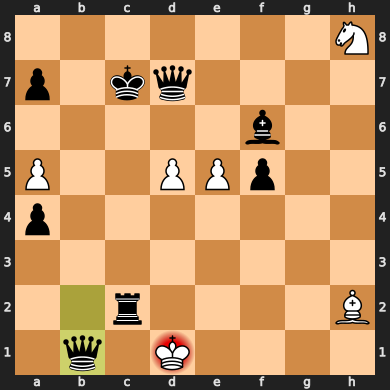

In [40]:
board2

In [41]:
conn.close()
remove_context()

True